In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('train.csv')
data = np.array(data)
np.random.shuffle(data)
m, n = data.shape
print(m, n)

42000 785


In [2]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

def splitData(data: np.ndarray, train_percent=0.8):
    m, n = data.shape
    numSplit = int(42000 * train_percent)
    
    train = data[0:numSplit].T
    y_train = train[0:1]
    x_train = train[1:n]
    
    test = data[numSplit:m].T
    y_test = test[0:1]
    x_test = test[1:n]
    
    return x_train, y_train, x_test, y_test
    
x_train, y_train, x_test, y_test = splitData(data)

In [9]:
x_train.shape

(784, 33600)

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.10, 500)

/var/folders/n4/wtkf6_bj131_573hkrny3lh00000gn/T/ipykernel_10249/3962810796.py:12: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
/var/folders/n4/wtkf6_bj131_573hkrny3lh00000gn/T/ipykernel_10249/3962810796.py:12: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / sum(np.exp(Z))


Iteration:  0
[6 6 6 ... 2 9 6] [[9 2 0 ... 8 7 6]]
0.10395833333333333
Iteration:  10
[0 0 0 ... 0 0 0] [[9 2 0 ... 8 7 6]]
0.09782738095238096
Iteration:  20
[0 0 0 ... 0 0 0] [[9 2 0 ... 8 7 6]]
0.09782738095238096
Iteration:  30
[0 0 0 ... 0 0 0] [[9 2 0 ... 8 7 6]]
0.09782738095238096
Iteration:  40
[0 0 0 ... 0 0 0] [[9 2 0 ... 8 7 6]]
0.09782738095238096
Iteration:  50
[0 0 0 ... 0 0 0] [[9 2 0 ... 8 7 6]]
0.09782738095238096
Iteration:  60
[0 0 0 ... 0 0 0] [[9 2 0 ... 8 7 6]]
0.09782738095238096
Iteration:  70
[0 0 0 ... 0 0 0] [[9 2 0 ... 8 7 6]]
0.09782738095238096
Iteration:  80
[0 0 0 ... 0 0 0] [[9 2 0 ... 8 7 6]]
0.09782738095238096


KeyboardInterrupt: 

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


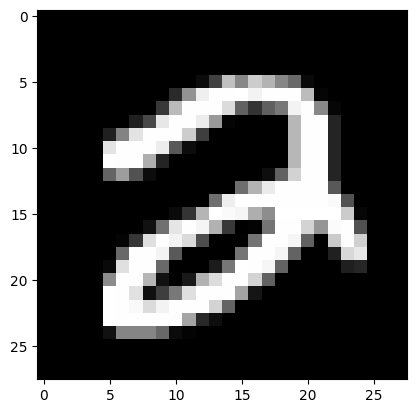

Prediction:  [1]
Label:  1


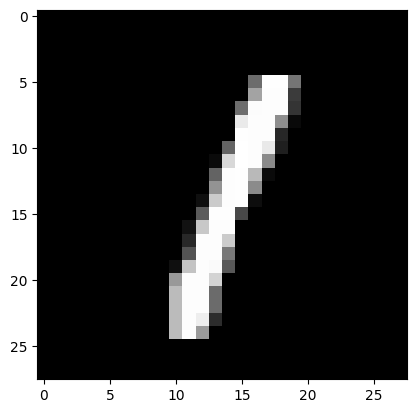

Prediction:  [1]
Label:  5


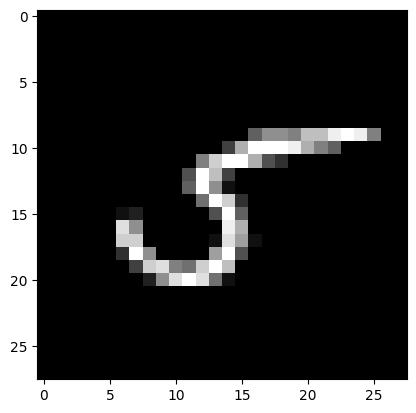

Prediction:  [2]
Label:  2


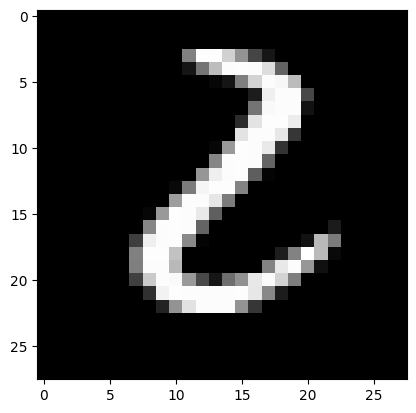

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 9 8 9 1 8 6 8 7 3 1 0 1 0 7 6 3 7 2 3 4 6 3 3 8 3 1 1 7 1 1 4 9 6 3 3 4
 9 8 0 3 6 2 6 3 2 6 6 4 0 7 5 9 7 0 1 7 1 6 6 6 0 5 5 4 1 2 2 5 4 0 1 1 7
 7 4 2 5 0 7 2 8 4 5 4 1 7 5 3 7 4 9 6 1 2 4 2 3 1 1 2 5 5 5 7 5 9 1 9 8 8
 6 9 6 0 9 3 9 2 3 9 1 7 8 7 4 1 5 9 5 7 1 2 9 5 9 1 8 2 0 8 9 7 9 1 3 8 1
 6 0 2 8 0 6 7 7 1 8 0 8 5 3 8 7 6 2 8 1 3 6 6 7 1 6 0 1 1 7 5 9 2 8 2 6 6
 4 6 0 5 0 2 3 5 9 8 0 3 9 6 6 3 1 4 4 9 6 1 3 8 3 9 9 6 8 1 7 2 1 9 7 6 4
 0 1 9 7 3 2 0 1 8 1 1 8 6 8 6 9 1 0 6 1 3 3 6 7 4 9 3 9 2 7 9 4 1 6 1 3 8
 0 4 4 5 8 8 8 0 4 8 7 2 3 4 5 5 8 6 6 7 8 4 1 0 2 8 3 8 7 3 9 6 9 2 8 0 8
 9 9 6 6 2 5 7 2 7 1 5 9 5 9 7 1 6 4 6 9 8 5 6 0 0 3 5 1 7 1 6 7 1 1 8 0 8
 3 5 7 8 4 1 9 8 6 4 3 7 2 8 0 6 2 3 1 5 0 6 8 7 5 6 8 9 4 5 8 0 7 4 4 6 3
 9 7 1 8 4 9 6 4 3 6 8 1 9 1 9 8 6 3 8 9 9 6 5 1 5 4 7 6 9 6 3 0 3 5 1 8 0
 1 7 8 4 9 7 5 2 3 3 4 2 3 6 1 8 9 8 5 4 6 7 0 7 3 9 9 1 0 0 9 2 1 9 6 4 5
 4 3 3 6 0 6 1 1 7 9 4 4 1 7 1 7 0 4 5 3 3 8 8 6 0 1 7 1 3 1 1 9 5 5 2 1 3
 6 3 5 2 7 4 3 8 3 5 8 3 

0.86